In [33]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [34]:
IMAGE_SIZE = 256
CHANNELS = 3
CLASS_NAMES = ["Early Blight", "Late Blight", "Healthy"]

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#        save_to_dir="AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [36]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.6324399  0.5696948  0.5736164 ]
  [0.6142613  0.55151623 0.5554378 ]
  [0.584684   0.5219389  0.5258605 ]
  ...
  [0.45587248 0.342147   0.34999013]
  [0.45699427 0.34326878 0.35111192]
  [0.45811602 0.34439054 0.35223368]]

 [[0.6328886  0.57014346 0.574065  ]
  [0.6144857  0.5517405  0.5556621 ]
  [0.5856562  0.52291113 0.5268327 ]
  ...
  [0.45754382 0.34381834 0.35166147]
  [0.45604813 0.34232265 0.35016578]
  [0.4545524  0.34082693 0.34867007]]

 [[0.6333373  0.5705922  0.5745138 ]
  [0.61471003 0.55196494 0.5558865 ]
  [0.5866285  0.5238834  0.527805  ]
  ...
  [0.47867268 0.36494717 0.3727903 ]
  [0.48173887 0.36801338 0.37585652]
  [0.48480505 0.37107956 0.3789227 ]]

 ...

 [[0.69055474 0.6199665  0.6199665 ]
  [0.69070435 0.6201161  0.6201161 ]
  [0.69085383 0.6202656  0.6202656 ]
  ...
  [0.6287415  0.515016   0.52285916]
  [0.5470177  0.43329215 0.4411353 ]
  [0.52549815 0.41177267 0.4196158 ]]

 [[0.68556017 0.6149719  0.6149719 ]
  [0.685261   0.6146728  0.6146728 ]


In [37]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [38]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [39]:
input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    layers.InputLayer(shape=input_shape),
    layers.Conv2D(32, (3,3), activation='relu'),  
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),  
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),  
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),  
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),  
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),  
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [42]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.4623 - loss: 0.9544 - val_accuracy: 0.4792 - val_loss: 0.8709
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5312 - loss: 0.7622 - val_accuracy: 0.4783 - val_loss: 0.9545
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.5385 - loss: 0.8779 - val_accuracy: 0.6458 - val_loss: 0.7508
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6250 - loss: 0.9271 - val_accuracy: 0.6957 - val_loss: 0.7007
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.7424 - loss: 0.5868 - val_accuracy: 0.7917 - val_loss: 0.4551
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8438 - loss: 0.3943 - val_accuracy: 0.7391 - val_loss: 0.5591
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.7838 - loss: 0.4802 - val_accuracy: 0.8906 - val_loss: 0.3204
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7812 - loss: 0.3568 - val_accuracy: 0.7826 - val_loss

In [11]:
scores = model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 646ms/step - accuracy: 0.9166 - loss: 0.2105


In [12]:
scores

[0.1880335658788681, 0.9303944110870361]

In [13]:
history

In [14]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [15]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [16]:
type(history.history['loss'])

list

In [17]:
len(history.history['loss'])

20

In [18]:
history.history['loss'][:5]

[0.9123684167861938,
 0.8317152261734009,
 0.7701431512832642,
 0.4839167892932892,
 0.4390590786933899]

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [20]:
val_acc

[0.4427083432674408,
 0.6521739363670349,
 0.8125,
 0.695652186870575,
 0.8854166865348816,
 0.782608687877655,
 0.828125,
 0.6521739363670349,
 0.890625,
 0.95652174949646,
 0.8958333134651184,
 0.8695651888847351,
 0.9322916865348816,
 0.9130434989929199,
 0.8489583134651184,
 1.0,
 0.90625,
 0.8695651888847351,
 0.953125,
 0.8695651888847351]

In [21]:
acc

[0.47286295890808105,
 0.5625,
 0.6506105661392212,
 0.6875,
 0.8242876529693604,
 0.875,
 0.8948439359664917,
 0.90625,
 0.9165536165237427,
 0.71875,
 0.9287652373313904,
 0.96875,
 0.9457259178161621,
 0.96875,
 0.8758480548858643,
 0.9375,
 0.9362279772758484,
 0.9375,
 0.9369063973426819,
 0.9375]

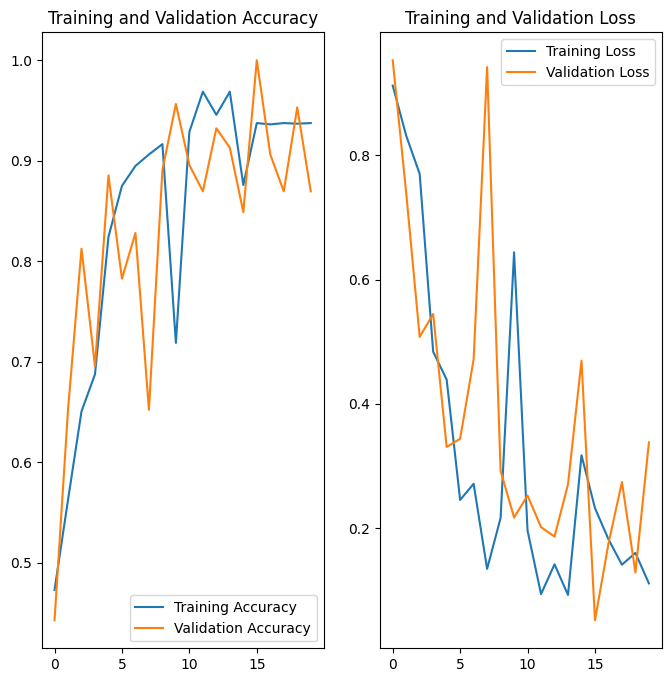

In [22]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Early Blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
predicted label: Early Blight


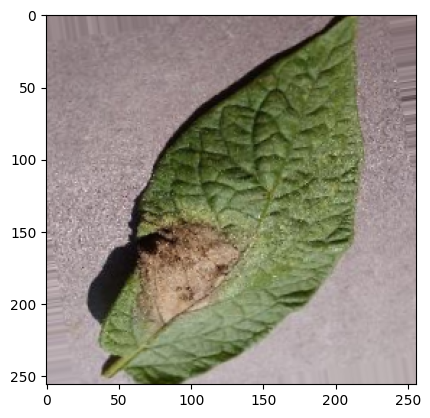

In [23]:
import numpy as np

for images_batch, labels_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",CLASS_NAMES[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",CLASS_NAMES[np.argmax(batch_prediction[0])])
    
    break

In [43]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = CLASS_NAMES[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


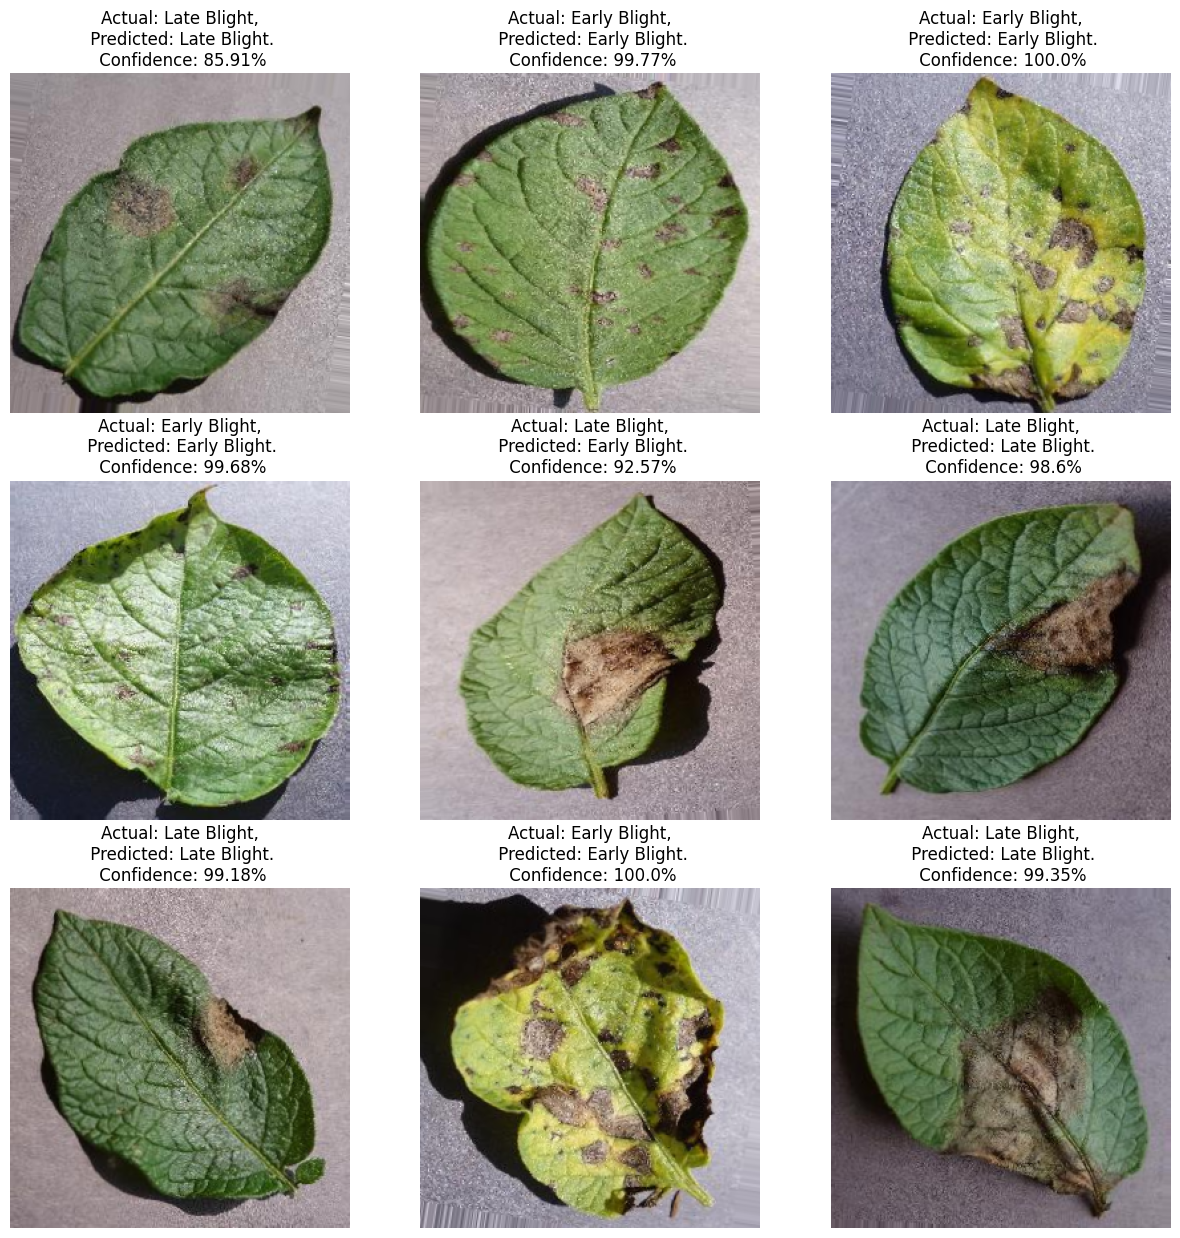

In [44]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = CLASS_NAMES[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [45]:
model.save("../potatoes.h5")